In [38]:
import pandas as pd

# Crear el DataFrame
data = {
    'promedio_Lenguaje'    : [3.0, 4.3, 4.0, 3.6, 3.7, 3.8, 3.9, 4.0, 4.0, 4.1],
    'promedio_Ingles'      : [2.5, 2.0, 2.5, 4.5, 4.5, 4.1, 3.3, 3.7, 3.8, 4.0],
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

   promedio_Lenguaje  promedio_Ingles
0                3.0              2.5
1                4.3              2.0
2                4.0              2.5
3                3.6              4.5
4                3.7              4.5
5                3.8              4.1
6                3.9              3.3
7                4.0              3.7
8                4.0              3.8
9                4.1              4.0


In [39]:
x = df['promedio_Lenguaje']
y = df['promedio_Ingles']

In [40]:
df['xy'] = df['promedio_Lenguaje'] * df['promedio_Ingles']
df['x^2'] = df['promedio_Lenguaje'] ** 2
df

,promedio_Lenguaje,promedio_Ingles,xy,x^2
0,3.0,2.5,7.50,9.00
1,4.3,2.0,8.60,18.49
2,4.0,2.5,10.00,16.00
3,3.6,4.5,16.20,12.96
4,3.7,4.5,16.65,13.69
5,3.8,4.1,15.58,14.44
6,3.9,3.3,12.87,15.21
7,4.0,3.7,14.80,16.00
8,4.0,3.8,15.20,16.00
9,4.1,4.0,16.40,16.81


In [41]:
sum_x = df['promedio_Lenguaje'].sum()
sum_y = df['promedio_Ingles'].sum()
sum_xy = df['xy'].sum()
sum_x2 = df['x^2'].sum()
print(sum_x, sum_y, sum_xy, sum_x2)

38.4 34.900000000000006 133.8 148.60000000000002


In [42]:
m = (len(df) * sum_xy - sum_x * sum_y) / (len(df) * sum_x2 - sum_x * sum_x)
m

-0.1888111888111913

In [43]:
b = (sum_y - m * sum_x) / len(df)
b

4.215034965034976

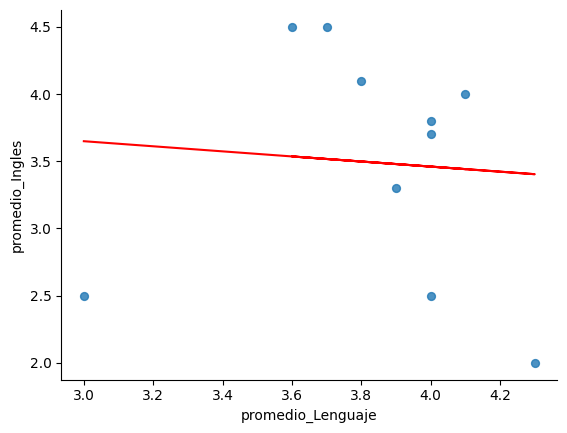

In [44]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='promedio_Lenguaje', y='promedio_Ingles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.plot(df['promedio_Lenguaje'], m * df['promedio_Lenguaje'] + b, color='red')
plt.show()

Mean Squared Error: 25355098.200955767
R^2 Score: -1.8172331334395295
Coeficiente: 540.4699738903392
Intercepción: 26360.3133159269


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


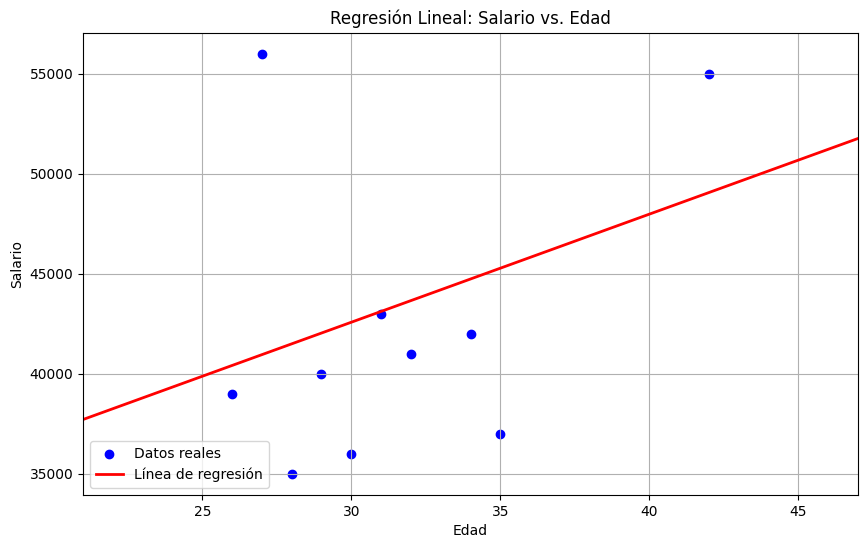

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Datos del DataFrame
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Marta', 'Pedro', 'Laura', 'Jorge', 'Sofía', 'Daniel', 'María'],
    'Edad': [28, 34, 29, 42, 35, 26, 32, 27, 30, 31],
    'Departamento': ['Ventas', 'Marketing', 'IT', 'Finanzas', 'Ventas', 'Marketing', 'IT', 'Finanzas', 'Ventas', 'IT'],
    'Salario': [35000, 42000, 40000, 55000, 37000, 39000, 41000, 56000, 36000, 43000]
}

df = pd.DataFrame(data)

# Variables independientes y dependientes
X = df[['Edad']]  # Variable independiente
y = df['Salario']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Mostrar los coeficientes del modelo
print(f"Coeficiente: {model.coef_[0]}")
print(f"Intercepción: {model.intercept_}")

# Crear un rango extendido de valores de edad para la predicción
edad_min = X['Edad'].min() - 5
edad_max = X['Edad'].max() + 5
X_range = np.linspace(edad_min, edad_max, 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)

# Gráfico de la regresión lineal con la línea extendida
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.title('Regresión Lineal: Salario vs. Edad')
plt.legend()
plt.grid(True)
plt.xlim(edad_min, edad_max)
plt.show()

In [52]:
edad_min

21